# Assignment 03 – – Visualising Email Domain Distribution

This notebook analyses a dataset of 1,000 individuals to explore the distribution of email domains. The results are presented using a pie chart, styled for clarity and visual appeal. This task demonstrates basic data wrangling and visualisation skills using Python.


### 1. Import Libraries

In [1]:
# ▶️ Setup / Initialisation Cell
# Run this once at the start to import required libraries and verify the environment.
import time, sys
t0 = time.time()

# Core libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# Standard library utilities
from pathlib import Path
import itertools

print("Python executable:", sys.executable)
print("Initialization elapsed: {:.2f}s".format(time.time() - t0))


Python executable: c:\Users\eCron\anaconda3\envs\assignments\python.exe
Initialization elapsed: 1.97s


### 2. Download the dataset

The dataset is hosted on Google Drive. The following code downloads it and saves it locally.

In [2]:
# Define download URL and local save path
url = "https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download"
data_path = Path("data/assignment03_people.csv")
data_path.parent.mkdir(exist_ok=True)

# Download and save the file
response = requests.get(url)
data_path.write_bytes(response.content)

print(f"✅ Dataset saved to: {data_path.resolve()}")


✅ Dataset saved to: C:\Users\eCron\OneDrive\Documents\ATU_CourseWork\Programming For Data Analytics\programming-for-data-analytics\assignments\data\assignment03_people.csv


### 3. Load the Data

Load the CSV file into a DataFrame and inspect the structure

In [3]:
# Load the CSV file into a pandas DataFrame
# This reads structured tabular data from the specified file path
df = pd.read_csv(data_path)  
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

# Preview the first five rows of the dataset
# Useful for checking column names, data types, and general structure
df.head()  
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html


,Index,User Id,First Name,Last Name,Sex,Email,Phone,Date of birth,Job Title
0,1,8717bbf45cCDbEe,Shelia,Mahoney,Male,pwarner@example.org,857.139.8239,2014-01-27,Probation officer
1,2,3d5AD30A4cD38ed,Jo,Rivers,Female,fergusonkatherine@example.net,+1-950-759-8687,1931-07-26,Dancer
2,3,810Ce0F276Badec,Sheryl,Lowery,Female,fhoward@example.org,(599)782-0605,2013-11-25,Copy
3,4,BF2a889C00f0cE1,Whitney,Hooper,Male,zjohnston@example.com,+1-939-130-6258,2012-11-17,Counselling psychologist
4,5,9afFEafAe1CBBB9,Lindsey,Rice,Female,elin@example.net,(390)417-1635x3010,1923-04-15,Biomedical engineer


### 4. Extract Email Domains

We extract the domain (e.g. gmail.com) from each email address to analyse their frequency.


In [4]:
# Extract domain from email safely
df['domain'] = (
    df['Email']
    .astype(str)
    .str.lower()
    .str.extract(r'@([\w\.-]+)$')[0]
)

# Count frequency of each domain
domain_counts = df['domain'].value_counts()

# Count number of unique domain types
unique_domain_count = df['domain'].nunique()

# Display results
print(f"📌 Total unique email domain types: {unique_domain_count}")
print("📊 Domain frequency table:")
print(domain_counts)


📌 Total unique email domain types: 3
📊 Domain frequency table:
domain
example.org    341
example.com    339
example.net    320
Name: count, dtype: int64


### 🥧 Create the Pie Chart

The chart displays the top email domain types directly as only three unique domains exist in the dataset, so no additional grouping is required.

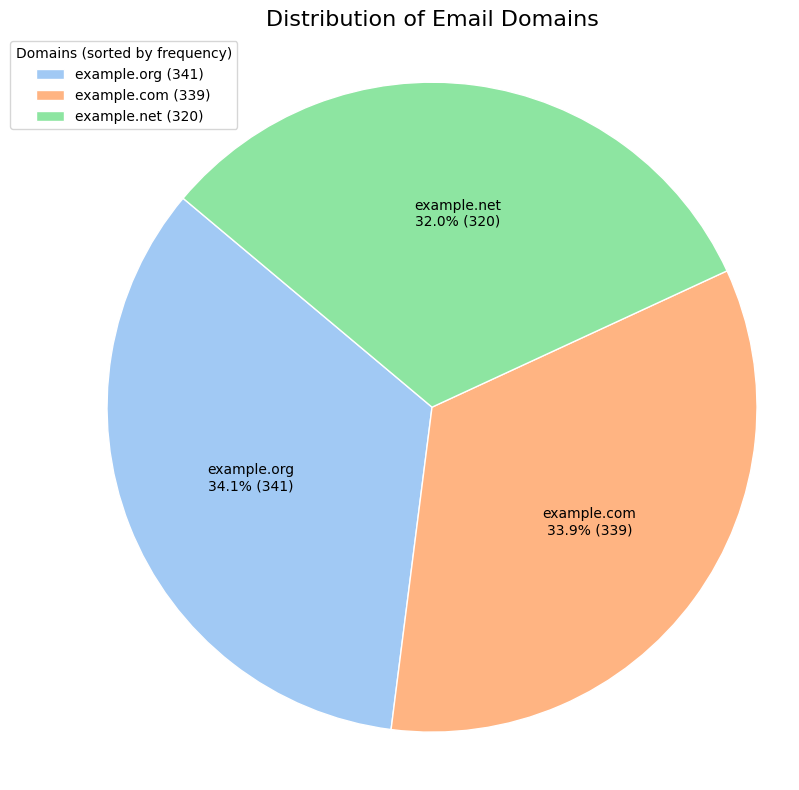

In [5]:
# Prepare labels and sizes from full domain distribution
if 'domain_counts' not in globals():
    if 'domain' not in df.columns:
        df['domain'] = (
            df['Email']
            .astype(str)
            .str.lower()
            .str.extract(r'@([\w\.-]+)$')[0]
        )
    domain_counts = df['domain'].value_counts()

# Sort domains by frequency (largest first)
domain_counts = domain_counts.sort_values(ascending=False)

labels = domain_counts.index.tolist()
sizes = domain_counts.values.tolist()
colours = sns.color_palette('pastel', n_colors=len(labels))

def make_autopct(values, labels):
    """Return autopct function that shows domain, percentage and count inside slices."""
    counter = itertools.count()

    def autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        idx = next(counter)
        return f"{labels[idx]}\n{pct:.1f}% ({count})"

    return autopct
    autopct.counter = 0
    return autopct

fig, ax = plt.subplots(figsize=(8, 8))
pie_result = ax.pie(
    sizes,
    labels=None,  # suppress external labels
    autopct=make_autopct(sizes, labels),
    startangle=140,
    colors=colours,
    wedgeprops={'edgecolor': 'white'},
    textprops={'fontsize': 10}
)

# Handle return values safely
if len(pie_result) == 3:
    wedges, texts, autotexts = pie_result
    autotexts = list(autotexts)
else:
    wedges, texts = pie_result
    autotexts = []

# Finalise chart
ax.set_title('Distribution of Email Domains', fontsize=16)
ax.axis('equal')  # keep pie circular

# Legend in the top left corner
ax.legend(
    wedges,
    [f"{label} ({count})" for label, count in zip(labels, sizes)],
    title="Domains (sorted by frequency)",
    loc="upper left",
    bbox_to_anchor=(-0.1, 1),
    fontsize=10
)

plt.tight_layout()
plt.show()


### 6. 💾 Save the Chart

Save the chart to the plots directory for examination and submission.

In [6]:
plot_path = Path("plots/assignment-03-pie-chart.jpg")
plot_path.parent.mkdir(exist_ok=True)
fig.savefig(str(plot_path), dpi=150)
print(f"📁 Chart saved to: {plot_path.resolve()}")

📁 Chart saved to: C:\Users\eCron\OneDrive\Documents\ATU_CourseWork\Programming For Data Analytics\programming-for-data-analytics\assignments\plots\assignment-03-pie-chart.jpg
